<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Luis Antonio Barriga Adame, Santiago Cataño Besson.

**Fecha:** 06 de Marzo del 2023.

**Expediente** : 730512, 727527 .
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/Luis168735/ProyectoConjunto_CB_Santiago_LA_Barriga

# Tarea 4: Clase 9 y 10

#### Tarea clase 9
Para las siguiente dos funciones, genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 1000 muestras generadas con el método de la transformada inversa y compárela con el función $f(x)$ **(recuerde que $f(x)$ es la distribución de probabilidad y $F(x)$ es la distribución de probabilidad acumulada)**
 
> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>
> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$


### Ejercicio 1: 

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sps 
from math import factorial as fac
from scipy import optimize
from scipy.stats import beta
import pandas as pd

Código de solución estudiante 1: Luis


$$F(x) = \frac{2}{\pi}\sin^{-1}(\sqrt x) = y$$

$$= \sin(y) = \sqrt x$$

$$= y = \sin^{-1}(\sqrt x)$$

$$F^{-1}(u) = \sin^2\left(\frac{\pi u}{2}\right),\quad 0\leq u\leq 1$$



<ipython-input-89-9d9525d13dd8>:15: RuntimeWarning: divide by zero encountered in divide
  fx = 1/(np.pi*np.sqrt(x*(1-x)))


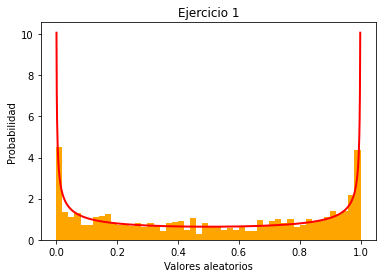

In [89]:
# Generamos 1000 variables aleatorias continuas uniformes usando rand.
u = np.random.rand(1000)

#Primero definimos la función de probabilidad acumulada(F(x)):
def Fun_prob_acum(x):
    return 2/np.pi * np.arcsin(np.sqrt(x))

# Ahora definimos la inversa(F(x)^-1):
def Inversa(y):
    return np.sin(np.pi*y/2)**2

Sol1 = Inversa(u)
#Función de densidad de probabilidad (f(x)) esta es la linea que va por encima y nos muestra si es que se hizo correctamente.
x = np.linspace(0, 1, 1000)
fx = 1/(np.pi*np.sqrt(x*(1-x)))

#Graficamos
plt.hist(Sol1,bins=50,density=True, color= "orange")
plt.plot(x, fx, 'r', linewidth=2)

plt.xlabel("Valores aleatorios")
plt.ylabel("Probabilidad")
plt.title("Ejercicio 1")
plt.show()

Podemos observar que el histograma de las muestras generadas se parece a la función de distribución de probabilidad $f(x)$, lo que nos da a entender queeste método de la transformada inversa es efectivo para generar muestras aleatorias que distribuyan según la función dada.

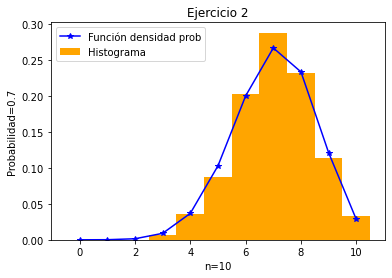

In [101]:
#Función para generar distribución discreta
def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U =np.random.rand(N)
    # Diccionario de valores aleatorios
    rand2reales = {i: idx for i, idx in enumerate(indices)}

    # Series de los valores aletorios
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)

    return y
# Función que calcula la probabilidad acumulada optimizada de la distribución Binomial
def P_acum_Binomial_o(n,p):
    Pr = np.zeros(n)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)

#Definimos los parametros de la distribución binomial
n=10
p=0.7
N=1000
p_acum = P_acum_Binomial_o(n,p)
#Generamos 1000 muestras usando el método de la transformada inversa
d_binomial = Gen_distr_discreta(p_acum, np.arange(0, n+1), N)

# Gráficamos el histograma
plt.hist(d_binomial, density=True, bins=np.arange(n+2)-0.5, color="orange" , label="Histograma")
# Graficar la función de densidad de probabilidad
x = np.arange(n+1)
fx = [np.math.comb(n, i) * p**i * (1-p)**(n-i) for i in x]
plt.plot(x, fx, 'b*-', label="Función densidad prob")
plt.xlabel('n=10')
plt.ylabel('Probabilidad=0.7')
plt.title('Ejercicio 2')
plt.legend()
plt.show()

Podemos ver que la funcion de densidad de probabilidad se adapta al histograma, no perfectamente, pero se parecen, por lo que se puede llegar a concluir que es efectiva estas variables aleatorias discrevtas para una distribución binomial.

Código de solución estudiante 2: Santiago

Ejercicio 1

<ipython-input-3-eb0fd83b8f13>:16: RuntimeWarning: divide by zero encountered in true_divide
  pdf = 2 / (np.pi * np.sqrt(x) * np.sqrt(1 - x))


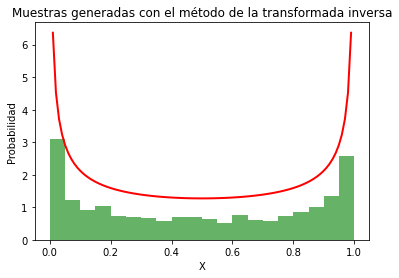

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función de distribución acumulada inversa
def invCDF(y):
    return np.sin(np.pi * y / 2) ** 2

# Generar 1000 muestras aleatorias distribuidas según la función dada
samples = [invCDF(np.random.random()) for i in range(1000)]

# Graficar el histograma de las muestras generadas
plt.hist(samples, bins=20, density=True, alpha=0.6, color='g')

# Graficar la función de densidad de probabilidad
x = np.linspace(0, 1, 100)
pdf = 2 / (np.pi * np.sqrt(x) * np.sqrt(1 - x))
plt.plot(x, pdf, 'r', lw=2)

plt.xlabel('X')
plt.ylabel('Probabilidad')
plt.title('Muestras generadas con el método de la transformada inversa')

plt.show()


Podemos ver que el histograma de las muestras generadas se asemeja bastante bien a la función de densidad de probabilidad, lo que sugiere que el método de la transformada inversa ha generado muestras aleatorias que siguen la distribución dada de manera efectiva.

Ejercicio 2

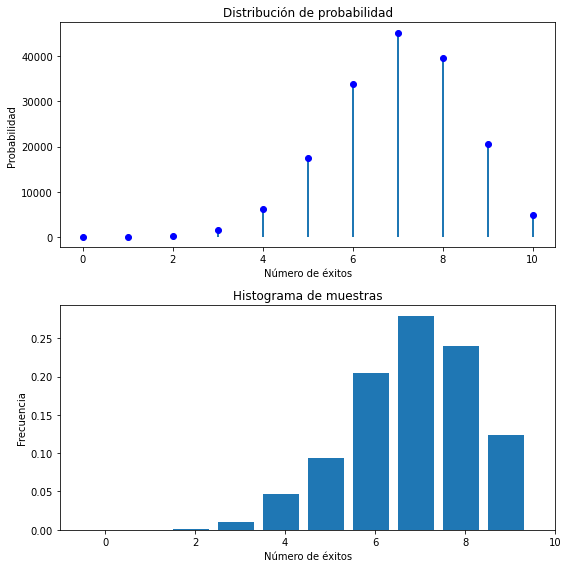

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def binomial(n, p):
    # Calculamos las probabilidades de éxito para cada i
    prob = [1] * (n + 1)
    for i in range(n):
        prob[i+1] = prob[i] * (n-i) * p / (i+1) / (1-p)
    return prob

def inverse_transform_sampling(dist, n_samples):
    # Generamos la distribución acumulada
    cum_dist = np.cumsum(dist)
    
    # Normalizamos la distribución acumulada para que esté entre 0 y 1
    cum_dist = cum_dist / cum_dist[-1]
    
    # Generamos una muestra uniforme
    u = np.random.random(n_samples)
    
    # Encontramos el valor correspondiente en la distribución inversa
    return np.searchsorted(cum_dist, u)

# Definimos los parámetros de la distribución binomial
n = 10
p = 0.7

# Generamos la distribución de probabilidad y la acumulada
x = np.arange(n+1)
prob = binomial(n, p)
cum_prob = np.cumsum(prob)

# Generamos las muestras usando el método de la transformada inversa
n_samples = 1000
samples = inverse_transform_sampling(prob, n_samples)

# Graficamos la distribución de probabilidad
fig, axs = plt.subplots(2, 1, figsize=(8,8))
axs[0].plot(x, prob, 'bo')
axs[0].vlines(x, 0, prob, lw=2)
axs[0].set_title('Distribución de probabilidad')
axs[0].set_xlabel('Número de éxitos')
axs[0].set_ylabel('Probabilidad')

# Graficamos el histograma de las muestras
axs[1].hist(samples, bins=x-0.5, density=True, width=0.8, align='mid')
axs[1].set_title('Histograma de muestras')
axs[1].set_xlabel('Número de éxitos')
axs[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Podemos ver cómo se asemejan, por lo que la cumple con el propósito de generación variable aleatoria discreta. 

### Respuesta planteada en el ejercicio usando (markdown)
 La respuesta es .........